# Mask R-CNN - Inspect Ballon Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [2]:
pwd

'/home/jovyan'

In [0]:
ROOT_DIR = '/home/jovyan/Mask_RCNN-master'

In [4]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
#ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.balloon import balloon

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = ROOT_DIR + '/logs/balloon20190201T0431/mask_rcnn_balloon.h5mask_rcnn_balloon.h5' 

Using TensorFlow backend.


## Configurations

In [0]:
config = balloon.BalloonConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "datasets/balloon")

## TRAIN MODEL - USE PRETRAINED COCO WEIGHTS

In [12]:
!python3 balloon.py train --dataset='/content/gdrive/My Drive/Mask_RCNN-master/datasets/balloon' --weights=coco

Using TensorFlow backend.
Weights:  coco
Dataset:  /content/gdrive/My Drive/Mask_RCNN-master/datasets/balloon
Logs:  /content/gdrive/My Drive/Mask_RCNN-master/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_cl

## LOAD CONFIGURATIONS


In [0]:
# THIS CELL LOADS CONFIGURATIONS AND NOTEBOOK PREPARATIONS TO PREPARE FOR INFERENCE. DO NOT EDIT THIS CELL. SIMPLY RUN IT. 

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax



## LOAD VALIDATION DATA


In [0]:
# Load validation dataset
dataset = balloon.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

## Load Model and Weights

In [0]:
'''

Task 1 a): Load model to prepare for inference. Explore mrcnn.model directory to find:
         
        a) Which function to use
        b) What parameters to pass

'''

with tf.device(DEVICE):
  
  # YOUR CODE HERE
  

In [0]:
'''

Task 1 b): Once the model is loaded, it's time to load the weights to prepare for inference. Check mrcnn.model. 

'''
#weights_path = BALLOON_WEIGHTS_PATH

#CODE TO LOAD WEIGHTS

## RUN DETECTION

image ID: balloon.6810773040_3d81036d05_k.jpg (4) /content/gdrive/My Drive/Mask_RCNN-master/datasets/balloon/val/6810773040_3d81036d05_k.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (4,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (4, 4)                min:  130.00000  max:  889.00000  int32
gt_mask                  shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  bool


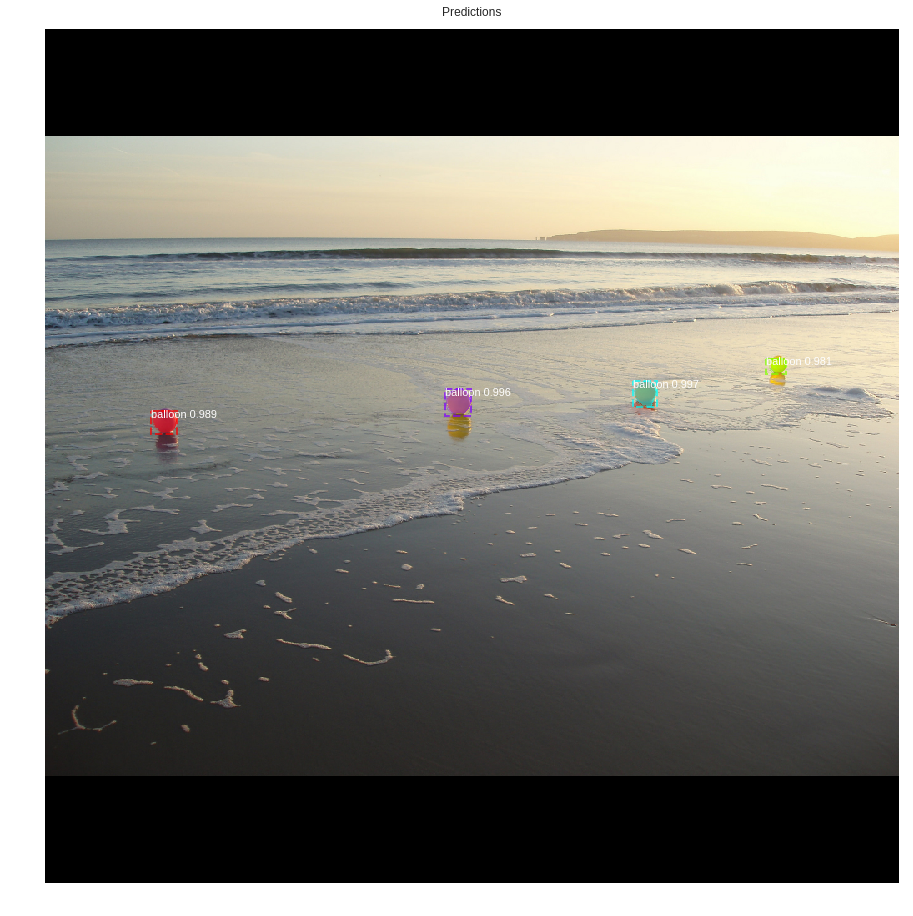

In [25]:
# RUN THIS CELL TO VIEW INFERENCE RESULTS

image_id = random.choice(dataset.image_ids)

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [0]:
'''

Task 2:

Run inference on 3 other unique images. 

'''

#YOUR CODE HERE

## Color Splash

This is for illustration. You can call `balloon.py` with the `splash` option to get better images without the black padding.

In [0]:
'''

Task :

Something fun. Explore balloon.py file and look for the color_splash function. 
Pass in the parameters required to view to results.

'''

#COMPLETE THE LINE BELOW
splash = 

#DISPLAY RESULT
display_images([splash], cols = 1)

# Congrats. You have reached the end! 